In [104]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from matplotlib import pyplot as plt
import seaborn as sns


In [105]:
df = pd.read_csv('train.csv')

## temp ateamp

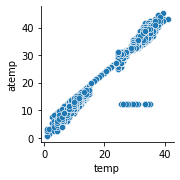

In [106]:
ax = sns.pairplot(data=df, x_vars=['temp'], y_vars='atemp')

plt.show()

In [107]:
df.loc[(df['atemp'] == 12.12) & (df['temp']>20), 'atemp'] = df.loc[(df['atemp'] == 12.12) & (df['temp']>20), 'temp'] 

## Date time

In [108]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['hours'] = df['datetime'].dt.hour
df['month'] = df['datetime'].dt.month
df['weekday'] = df['datetime'].dt.weekday
df['year'] = df['datetime'].dt.year

## Split

In [109]:
mask_df_train= (df['datetime'] <= ('2012-8-19 23:00:00')) 

df_train = df.loc[mask_df_train]
df_test = df.loc[-mask_df_train]

In [110]:
X_train = df_train.drop(['count','datetime', 'casual', 'registered'], axis = 1)
X_test = df_test.drop(['count','datetime', 'casual', 'registered'], axis = 1)
y_train = df_train['count']
y_test = df_test['count']

## Pipeline

In [111]:
continuous = ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'hours', 'month', 'weekday', 'year']
preprocessor = make_column_transformer((preprocessing.StandardScaler(), continuous), remainder='passthrough')

## Model

In [112]:
model = make_pipeline(preprocessor,RandomForestRegressor())

0.8789323071740031

###  randomized search cv

In [127]:
params = {}
params['criterion'] = ['squared_error', 'absolute_error', 'poisson']
params['max_features'] = ['auto', 'sqrt', 'log2']
params['min_impurity_decrease'] = [0.0,0.00001,0.001,0.01,0.1]
params['ccp_alpha'] = [0.0,0.001,0.0001,0.00001]

In [128]:
rand = RandomizedSearchCV(RandomForestRegressor(), params,n_iter=10, cv=5, scoring='r2')
rand.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'ccp_alpha': [0.0, 0.001, 0.0001,
                                                      1e-05],
                                        'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_impurity_decrease': [0.0, 1e-05,
                                                                  0.001, 0.01,
                                                                  0.1]},
                   scoring='r2')

In [131]:
rand.best_score_

0.587839678498024

In [132]:
rand.best_params_

{'min_impurity_decrease': 1e-05,
 'max_features': 'auto',
 'criterion': 'squared_error',
 'ccp_alpha': 0.0}